<a href="https://colab.research.google.com/github/kdstheace/Study_Python_MachineLearning/blob/main/%5BReview%5DCategorization_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classifying IRIS with Python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam #이전에 최적화 함수 sgd썼는데 이번엔 Adam쓸거야

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder #분류작업할 떼 레이블을 분류해줌. 이거 대신 원핫인코딩써도됨.

import seaborn as sns #iris데이터 가져오기 위함.

In [2]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
X = iris.iloc[:, 0:4].values
y = iris.iloc[:, 4].values

encoder = LabelEncoder()
temp = encoder.fit_transform(y)
#원핫인코딩은 아래와 같이 하면된다. get_dummies()라는 함수로 한다.
y1 = pd.get_dummies(temp).values

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.2, random_state=1)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(120, 4)
(120, 3)
(30, 4)
(30, 3)


In [5]:
model=Sequential()
model.add(Dense(units=64, activation='relu', input_dim=4))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=3, activation='softmax'))  #마지막에 나오는게 3개가 나와야한다!! 3개 카테고라이징이니까 3개이고 linear가 아닌 softmax

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 195       
Total params: 4,675
Trainable params: 4,675
Non-trainable params: 0
_________________________________________________________________


In [6]:
#최적화 컴파일 : 카테고리이니까 크로스엔트로피로 로스값을 써라
#원핫한경우는 categorical_crossentropy가 아니라 sparse_crossentropy
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(X_train, y_train, epochs = 200, validation_data=(X_test, y_test), verbose=1) #앞에 hist변수로 담는 것은 이후에 그래프 그려보려고(loss줄어드는지 할수록)

Epoch 1/200
4/4 [==============================] - 1s 197ms/step - loss: 1.8955 - accuracy: 0.3340 - val_loss: 1.1829 - val_accuracy: 0.5000
Epoch 2/200
4/4 [==============================] - 0s 22ms/step - loss: 1.3463 - accuracy: 0.5683 - val_loss: 1.0054 - val_accuracy: 0.8000
Epoch 3/200
4/4 [==============================] - 0s 20ms/step - loss: 1.0789 - accuracy: 0.6406 - val_loss: 0.9890 - val_accuracy: 0.6000
Epoch 4/200
4/4 [==============================] - 0s 18ms/step - loss: 0.9591 - accuracy: 0.7073 - val_loss: 1.0363 - val_accuracy: 0.2667
Epoch 5/200
4/4 [==============================] - 0s 17ms/step - loss: 0.9316 - accuracy: 0.3615 - val_loss: 1.0036 - val_accuracy: 0.2667
Epoch 6/200
4/4 [==============================] - 0s 16ms/step - loss: 0.8866 - accuracy: 0.4631 - val_loss: 0.9285 - val_accuracy: 0.5333
Epoch 7/200
4/4 [==============================] - 0s 18ms/step - loss: 0.8167 - accuracy: 0.6962 - val_loss: 0.8569 - val_accuracy: 0.5667
Epoch 8/200
4/4 [==

In [7]:
print(hist.history['loss'])
print(hist.history['accuracy'])
print(hist.history['val_loss'])
print(hist.history['val_accuracy'])

[1.861627459526062, 1.3426493406295776, 1.06057870388031, 0.9679241180419922, 0.914038360118866, 0.8702556490898132, 0.8150444030761719, 0.7652591466903687, 0.724789023399353, 0.6941468715667725, 0.653539776802063, 0.619273841381073, 0.5867182612419128, 0.5612782835960388, 0.5355483889579773, 0.5106734037399292, 0.49010398983955383, 0.4706464111804962, 0.45009568333625793, 0.4329848289489746, 0.4188166856765747, 0.40676766633987427, 0.3900792896747589, 0.37689417600631714, 0.3642772138118744, 0.35070332884788513, 0.337930291891098, 0.3261668384075165, 0.3171706795692444, 0.3065077066421509, 0.2957143783569336, 0.28651243448257446, 0.2772076427936554, 0.26815611124038696, 0.26174822449684143, 0.2515616714954376, 0.24650311470031738, 0.2364555150270462, 0.2324860543012619, 0.2218654602766037, 0.21906344592571259, 0.213203564286232, 0.2062397599220276, 0.19737331569194794, 0.1906682550907135, 0.18583573400974274, 0.1855064034461975, 0.17908914387226105, 0.17202380299568176, 0.167758896946

In [8]:
loss, acc = model.evaluate(X_test, y_test, verbose=1)
print(loss)
print(acc)

1/1 [==============================] - 0s 16ms/step - loss: 0.0521 - accuracy: 1.0000
0.05212445184588432
1.0


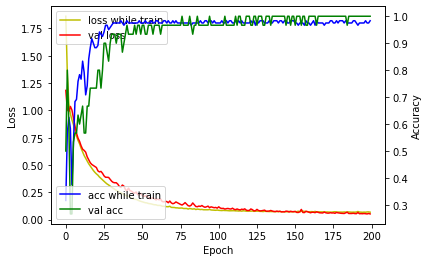

In [13]:
#학습을 잘하는지 여부를 그래프로 출력해보기
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='loss while train')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')


acc_ax.plot(hist.history['accuracy'], 'b', label='acc while train')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('Epoch')
loss_ax.set_ylabel('Loss')
acc_ax.set_ylabel('Accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()